# **Capitulo 3** - Un recorrido por los clasificadores de aprendizaje automático con scikit-learn 

**Temas que se verán en este capítulo**
- Introducción a algoritmos populares y robustos en la academia y en la industría, tales como: Regresión Logística, Máquinas de vectores de soporte y Árboles de decisión
- Inicios de la librería SciKit-Learn
- Fortalezas y debilidades de los clasificadores con limites de decisión lineales y no lineales.

### ¿Cómo elegir un algoritmo de clasificación?
No existe un modelo mejor que otro, el modelo optimo dependera del problema a resolver, la variable de rendimiento a optimizar, los datos de entrada, la cantidad de información, la respuesta requqerida del modelo, entre otras cosas. Esto realmente requiere de mucha practica y de conocer como funcionan los modelos por detras, de esta manera entender cuales son los modelos apropiados para cada situación.

Los aspectos a tener en cuenta son:
1. Recopilar la información de entrenamiento y seleccionar las caracteristicas 
2. Elegir una medición del rendimiento del modelo
3. Elegir un algoritmo clasificador y de optimización
4. Evaluar los rendimientos del modelo
5. Afinar el algoritmo

También es util aprender sobre AutoML, por ejemplo buscar utilizar librerias como NaiveAutoML, metodos como cross validation, entre otros.

En este capitulo continuaremos trabajando con el dataset de Iris que ya se encuentra en la libreria de SciKit-Learn

In [2]:
from sklearn import datasets
import numpy as np 
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() 
X = iris.data[:,[2,3]]
y = iris.target 
print('Class labels: ',np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)


Class labels:  [0 1 2]


Anteriormente utilizamos la función ***train_test_split*** para separar el conjunto de datos principal en conjunto de datos de entrenamiento y de prueba, con el parametro ***stratify*** conservamos la misma proporsion de etiquetas en ambas separaciones. Adicional el parametro ***test_size*** nos indica que el dataset de prueba (test) tiene un tamaño del **30%** del tamaño del dataset original, con esto podremos entrenar el modelo y posteriormente probar que funciona con datos nuevos y nunca antes vistos. 

Ahora vamos a estandarizar los atributos de entrada, para mejorar el rendimiento del modelo como lo vimos en el capitulo anterior:

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Con los datos preparados, llega la hora de realizar el entrenamiento de un modelo como el Perceptron, ahora, tenemos un inconveniente, el modelo de Perceptron, solo puede predecir 2 clases, para resolver esto utilizaremos un modulo de scikit-learn para implementar el metodo One-versus-Rest (OvR), lo que quiere decir que clasifica una sola clase como 1 y las demas como -1, obteniendo así un metodo de predicción de 2 clases. Un ejemplo es Setosa y la clase No Setosa.

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter_no_change = 40, eta0 = 0.01,random_state = 1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.01, n_iter_no_change=40, random_state=1)

Ahora estamos listos para realizar una predicción:

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print(f'Error: {(y_test != y_pred).sum()/len(y_test)}')
print(f'Precisión: {1-((y_test != y_pred).sum()/len(y_test))}')

Misclassified samples: 3
Error: 0.06666666666666667
Precisión: 0.9333333333333333


La librería de scikit-learn, también cuenta con modulos para calcular diferentes medidas de rendimiento, aunque el accuracy no es el que siempre vas a necesitar, acá tenemos un ejemplo de como calcularlo usando scikit-learn:

In [11]:
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_test,y_pred)}')

Accuracy: 0.9333333333333333


## Regiones de decisión 

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = 'yellow', edgecolor = 'black', alpha = 0.3, linewidths = 1, marker = 'o', s = 60, label = 'test set')

### Ahora gráficamos

/var/folders/4v/0z_6t5c56zx21srml8k375s40000gn/T/ipykernel_11014/4265394784.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')


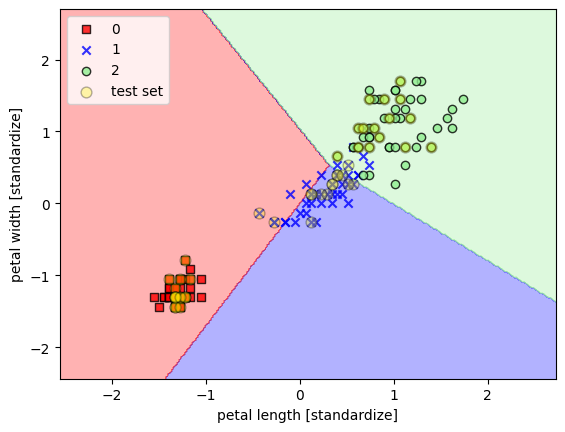

In [26]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.xlabel('petal length [standardize]')
plt.ylabel('petal width [standardize]')
plt.legend(loc = 'upper left')
plt.show()

## Conclusión del ejercicio con Perceptron
- Utilizando SciKit-Learn se simplifica el modelo y los parametros son muy similares al capitulo 2, solo cambia un poco la nomenclatura
- Como el problema no es separable linealmente, es imposible que el modelo del Perceptron funcione y converga correctamente, por lo que se deben utilizar otros clasificadores.
- Esta primera parte fue para familiarizarce con los comandos de SciKit-Learn 